In [1]:
from shapely.geometry import box, Point, Polygon 
from PythonLidarPackage import PythonLidarPackage
from IPython.display import Markdown, display, Image 

In [2]:
# fetcher = Lidar_Data_Fetch(PUBLIC_DATA_URL, epsg=epsg)
MINX, MINY, MAXX, MAXY = [-93.756155, 41.918015, -93.747334, 41.921429]

polygon = Polygon(((MINX, MINY), (MINX, MAXY),
                   (MAXX, MAXY), (MAXX, MINY), (MINX, MINY)))
epsg = 4326

In [3]:
lidarPkg = PythonLidarPackage(epsg)

In [4]:
result = lidarPkg.get_elevation_df(polygon, False, False)

trying to Fetch elevation data for year Unknown from file_name IA_FullState...
trying to Fetch elevation data for year 2009 from file_name NE_Rainwater-2_2009...
trying to Fetch elevation data for year 2010 from file_name SD_James_River_NRCS_J_2010...
trying to Fetch elevation data for year 2012 from file_name SD_Spink_County_2012...
trying to Fetch elevation data for year 2017 from file_name USGS_LPC_NE_NRCS_OrthoLidar_B2_2017_LAS_2019...
trying to Fetch elevation data for year 2016 from file_name USGS_LPC_NE_Hat_White_Cherry_UTM14_2016_LAS_2019...


In [5]:
df = result['Unknown']
display(df.head())
display(df.crs)

,elevation,geometry
0,318.49,POINT (-93.74734 41.92142)
1,318.48,POINT (-93.74744 41.92142)
2,318.42,POINT (-93.74738 41.92141)
3,318.58,POINT (-93.74735 41.92140)
4,318.29,POINT (-93.74748 41.92142)


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

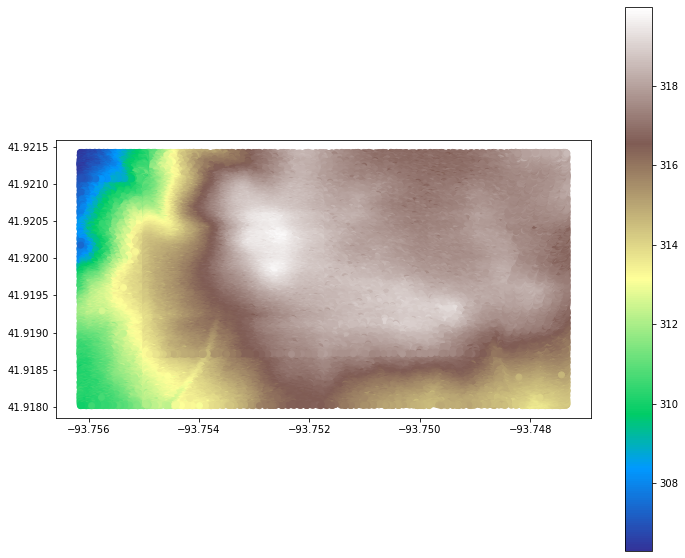

In [6]:
lidarPkg.get_heatmap_visulazation(df)

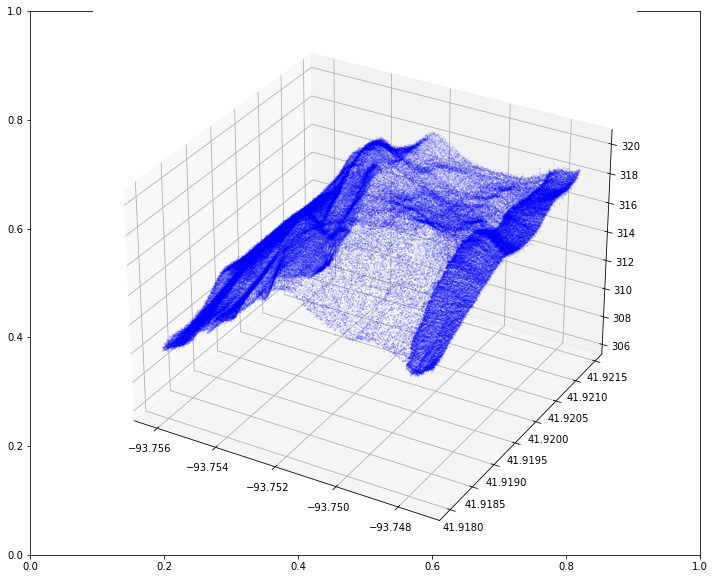

In [7]:
lidarPkg.get_3D_visualzation(df)

In [8]:
df_crs_changed = lidarPkg.covert_crs(df, crs_epgs=3857)
display(df_crs_changed.head())
df_crs_changed.crs

,elevation,geometry
0,318.49,POINT (-10435906.070 5149216.030)
1,318.48,POINT (-10435917.600 5149215.870)
2,318.42,POINT (-10435910.820 5149214.250)
3,318.58,POINT (-10435906.790 5149213.300)
4,318.29,POINT (-10435921.940 5149216.170)


<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
df_sampled = lidarPkg.subsampling_interpolation(df, 2)

subsampled number of points 66963


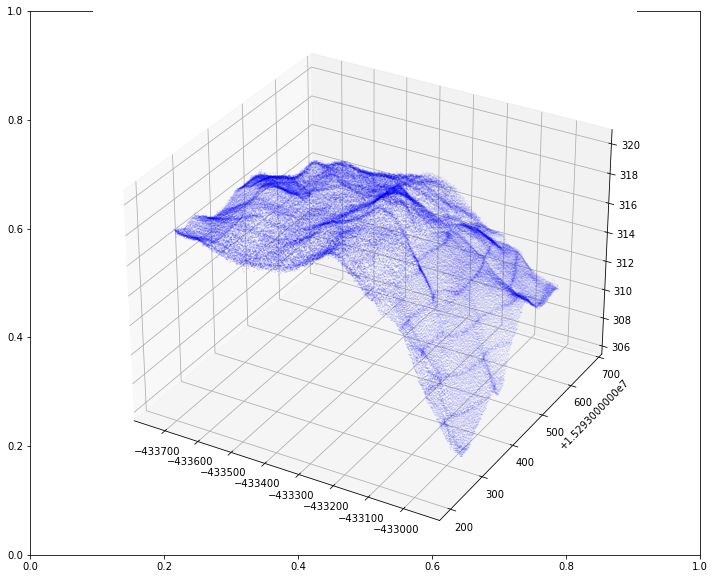

In [10]:
lidarPkg.get_3D_visualzation(df_sampled)

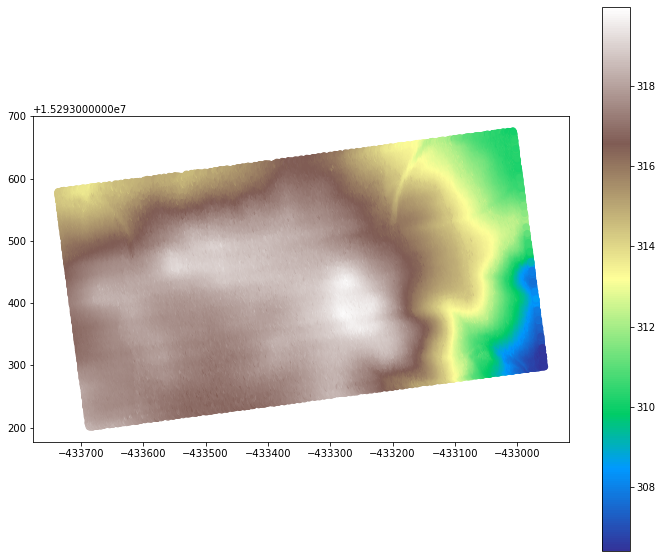

In [11]:
lidarPkg.get_heatmap_visulazation(df_sampled)

In [12]:
lidarPkg.save_elevation_geodata(df,  file_name="iwoa", save_format="shp")